# Predictive Maintenance using Machine Learning
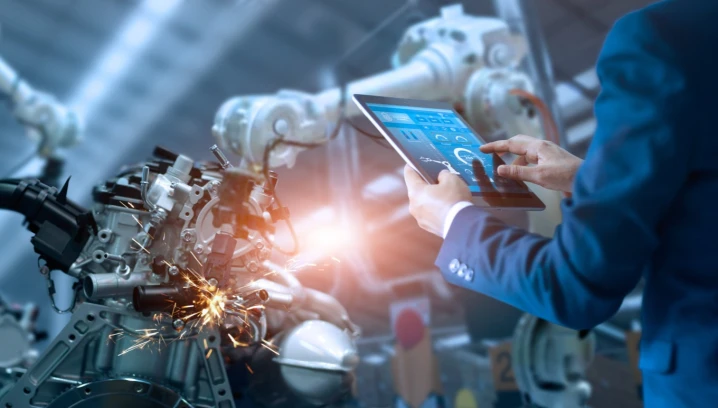

***Predictive maintenance*** *is a technique that uses data analysis tools and techniques to detect anomalies in the operation and possible defects in equipment and processes so that it is possible to fix it before the failure.*

This project emphasizes to demonstrate the use of machine learning in maintenance of machines in the industry. It approaches towards using the data for predicting the chance of failure and its type using machine learning models. The dataset used in this project has been obtained from the UCI Machine Learning Repository.

Dataset link: [Predictive Maintenance Dataset](https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset)

The code for approaching to build a model for predictive maintenance is provided below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('predictive_maintenance.csv')
df.head(4).style.background_gradient()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.100000,308.600000,1551,42.800000,0,0,No Failure
1,2,L47181,L,298.200000,308.700000,1408,46.300000,3,0,No Failure
2,3,L47182,L,298.100000,308.500000,1498,49.400000,5,0,No Failure
3,4,L47183,L,298.200000,308.600000,1433,39.500000,7,0,No Failure


In [3]:
df.describe().style.background_gradient(cmap='YlGn')

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.895680,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.750000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.500000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.250000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [4]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [5]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

## Visualising the data 

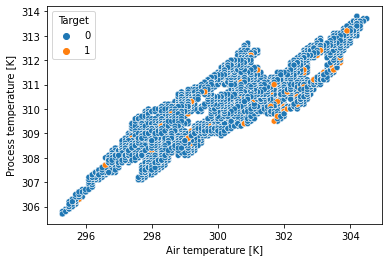

In [6]:
sns.scatterplot(x='Air temperature [K]', y='Process temperature [K]', 
            data=df, hue='Target')
plt.show()

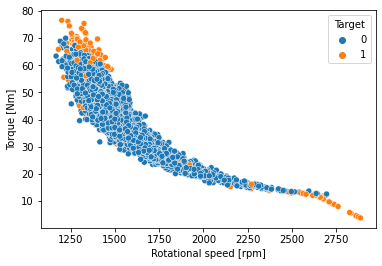

In [7]:
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', 
            data=df, hue='Target')
plt.show()

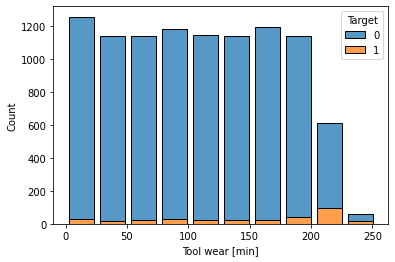

In [8]:
sns.histplot(x='Tool wear [min]', data=df, bins=10,
             stat='count', hue='Target', multiple='stack', shrink=0.8
            )
plt.show()

### Observations
In the following plots, target 0 refers to normal conditions and target 1 refers to occurence of failure.

>* From the **Air Temperature Vs Process Temperature** plot, it depicts at high temperatures occurence of failure is more which is quite obious but some failure points include low temperates as well which maybe due to other controlling factors.

>* In the plot of **Rotational speed Vs Torque**, failure points occur mostly when the rotational speed is low and torue is high and vice versa.

>* In the histogram plot of **Tool wear** it seems that failure occurs increases as tool wear increases.

In [9]:
df1 = df.drop(['UDI', 'Product ID', 'Failure Type', 'Target'], axis=1)
df1.head().style.background_gradient()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,M,298.100000,308.600000,1551,42.800000,0
1,L,298.200000,308.700000,1408,46.300000,3
2,L,298.100000,308.500000,1498,49.400000,5
3,L,298.200000,308.600000,1433,39.500000,7
4,L,298.200000,308.700000,1408,40.000000,9


## Preparing data for training

In [10]:
X = pd.get_dummies(df1)
X.head().style.background_gradient(cmap='YlGn')

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,298.100000,308.600000,1551,42.800000,0,0,0,1
1,298.200000,308.700000,1408,46.300000,3,0,1,0
2,298.100000,308.500000,1498,49.400000,5,0,1,0
3,298.200000,308.600000,1433,39.500000,7,0,1,0
4,298.200000,308.700000,1408,40.000000,9,0,1,0


In [11]:
y = df['Failure Type']

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)
X_scaled

array([[-0.95238944, -0.94735989,  0.06818514, ..., -0.33388861,
        -1.22474487,  1.52861702],
       [-0.90239341, -0.879959  , -0.72947151, ..., -0.33388861,
         0.81649658, -0.65418609],
       [-0.95238944, -1.01476077, -0.22744984, ..., -0.33388861,
         0.81649658, -0.65418609],
       ...,
       [-0.50242514, -0.94735989,  0.59251888, ..., -0.33388861,
        -1.22474487,  1.52861702],
       [-0.50242514, -0.879959  , -0.72947151, ...,  2.99501081,
        -1.22474487, -0.65418609],
       [-0.50242514, -0.879959  , -0.2162938 , ..., -0.33388861,
        -1.22474487,  1.52861702]])

#### Using GridSearchCV to find a good algorithm for building model

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model_params = {
    'decision tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy']
        }
    },
    
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1,10,20],
            'kernel': ['rbf', 'linear']
        }
    },

    'logistic regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [14]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_scaled, y)
    scores.append({
        'model name': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
pd.DataFrame(scores, columns=['model name', 'best_score', 'best_params'])

,model name,best_score,best_params
0,decision tree,0.9566,{'criterion': 'entropy'}
1,svm,0.9640,"{'C': 20, 'kernel': 'rbf'}"
2,logistic regression,0.9643,{'C': 1}


**Thus, Logistic Regression proves to be better choice to choose to build the model**

In [15]:
model = LogisticRegression(max_iter=1000, C=1)
model.fit(X_scaled, y)

LogisticRegression(C=1, max_iter=1000)

Testing the model on a sample value

In [16]:
z = scaler.transform([[290,310,1200,45,440,1,0,0]])
model.predict(z)

array(['Overstrain Failure'], dtype=object)

## Preparing the pickle file and other required files required

In [17]:
import pickle
with open('predictive_maintenance_model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [18]:
import json
columns = {
    'data-columns': [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [19]:
X.to_csv('X_data_for_scaling.csv', index=False)

**In the next step the model is to used to build a web app using streamlit and deploying the model**